In [71]:
import yfinance as yf
import pandas as pd


company1 = 'NVDA'
df1 = yf.download(company1, start="2024-07-01",end="2024-08-31")


company2 = "AAPL"
df2 = yf.download(company2, start="2024-07-01",end="2024-08-31")


company3 = "AMD"
df3 = yf.download(company3, start="2024-07-01",end="2024-08-31")

print(df1['Close'].head())
print(df2['Close'].head())
print(df3['Close'].head())


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Ticker            NVDA
Date                  
2024-07-01  124.300003
2024-07-02  122.669998
2024-07-03  128.279999
2024-07-05  125.830002
2024-07-08  128.199997
Ticker            AAPL
Date                  
2024-07-01  216.750000
2024-07-02  220.270004
2024-07-03  221.550003
2024-07-05  226.339996
2024-07-08  227.820007
Ticker             AMD
Date                  
2024-07-01  157.690002
2024-07-02  164.309998
2024-07-03  163.899994
2024-07-05  171.899994
2024-07-08  178.690002


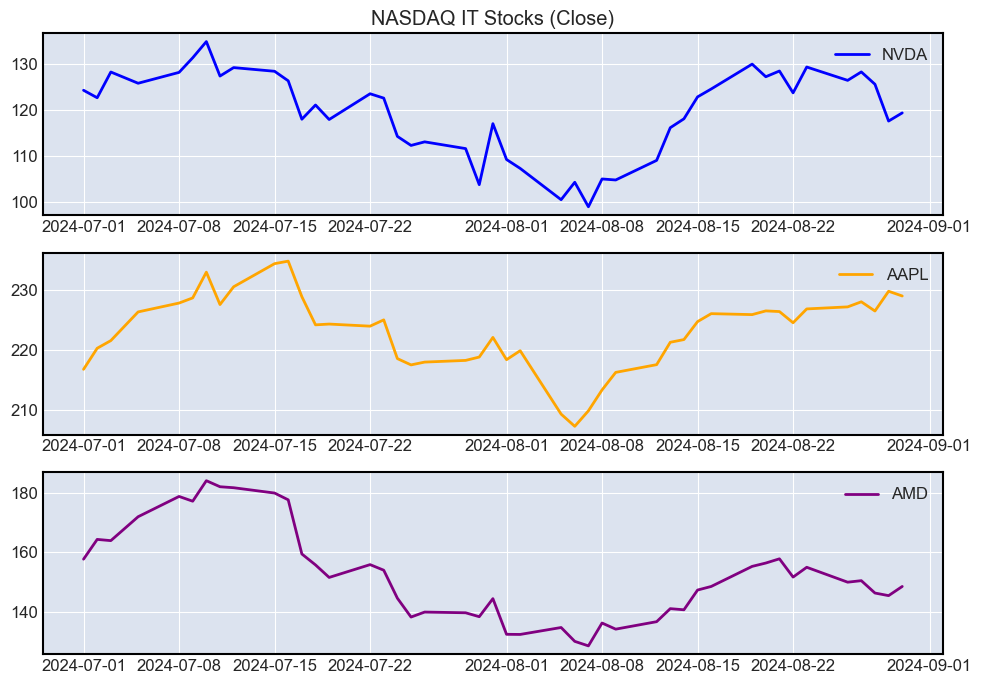

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plt.subplot(3, 1, 1)
plt.plot(df1.index, df1['Close'], label='NVDA', color='blue')
plt.title('NASDAQ IT Stocks (Close)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df2.index, df2['Close'], label='AAPL', color='orange')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df3.index, df3['Close'], label='AMD', color='purple')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()